In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
data = np.array(data)
m , n = data.shape
np.random.shuffle(data)
data_dev = data[:1000].T #transposing the data so we access each columns and not rows
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_, m_train = X_train.shape

In [30]:
# W, b is weights and biases 
def init_params():
    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2
    
def ReLU(Z):
    '''
    if z > 0, ReLU = z
    if z <= 0 ReLU = 0
    '''
    return np.maximum(Z, 0)

def softmax(Z):
    '''
    Preserves amount of column and collapses amount of rows to 1.
    Returns sum of each column
    '''
    return np.exp(Z) / sum(np.exp(Z)) # basically returns the value of the neuron between 0-1 by dividing itself with the sum of all values in array
    

def forward(w1, b1, w2, b2, X):
    Z1 = w1.dot(X) + b1 # creating activation function
    A1 = ReLU(Z1) 
    Z2 = w2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size),Y] = 1 #for each row go to the column specified by label in y and set it to 1 
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def derivative_relu(Z):
    '''
    the derivative of the relu function is always either 0 or 1.
    When Z> 0 the derivative is of a linear function which is 0
    When Z < 0 the derivative is 0 
    '''
    return Z > 0 #if Z > 0, returns 1 and if Z < 0 returns 0
    
def back_prop(Z1, A1, Z2, A2,W1, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y #derivative of Z2
    dW2 = 1 / m * dZ2.dot(A1.T) # derivative of W2
    db2 = 1 / m * np.sum(dZ2) # derivative of bias 2
    dZ1 = W2.T.dot(dZ2) * derivative_relu(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2 , dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha *dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha *dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2
    
    

In [21]:
def get_prediction(A2):
    return np.argmax(A2,0)
def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

In [31]:
def gradient_descent(X,Y, iteration, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iteration):
        Z1 , A1, Z2, A2 = forward(W1, b1, W2, b2, X)
        dW1 , db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2 , dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print("Iteration: " , i)
            print("Accuracy: " ,get_accuracy(get_prediction(A2), Y))
    return W1, b1, W2, b2

In [32]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 2000, 0.1)

Iteration:  0
Accuracy:  0.08258536585365854
Iteration:  50
Accuracy:  0.26995121951219514
Iteration:  100
Accuracy:  0.5298780487804878
Iteration:  150
Accuracy:  0.6843414634146342
Iteration:  200
Accuracy:  0.7389024390243902
Iteration:  250
Accuracy:  0.7702682926829268
Iteration:  300
Accuracy:  0.7922439024390244
Iteration:  350
Accuracy:  0.8072926829268293
Iteration:  400
Accuracy:  0.8199512195121951
Iteration:  450
Accuracy:  0.8286829268292683
Iteration:  500
Accuracy:  0.8354634146341463
Iteration:  550
Accuracy:  0.8412439024390244
Iteration:  600
Accuracy:  0.8464146341463414
Iteration:  650
Accuracy:  0.8511951219512195
Iteration:  700
Accuracy:  0.8546585365853658
Iteration:  750
Accuracy:  0.857390243902439
Iteration:  800
Accuracy:  0.8607317073170732
Iteration:  850
Accuracy:  0.8631951219512195
Iteration:  900
Accuracy:  0.8655853658536585
Iteration:  950
Accuracy:  0.8673414634146341
Iteration:  1000
Accuracy:  0.8692926829268293
Iteration:  1050
Accuracy:  0.87087

In [33]:
def make_prediction(X,W1 , b1, W2, b2):
    _, _, _, A2 = forward(W1, b1, W2, b2, X)
    prediction = get_prediction(A2)
    return prediction

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:,index, None]
    prediction = make_prediction(X_train[:,index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: " , label)

    current_image = current_image.reshape((28,28))*255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


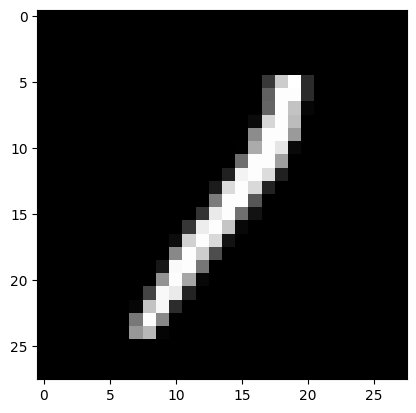

Prediction:  [1]
Label:  1


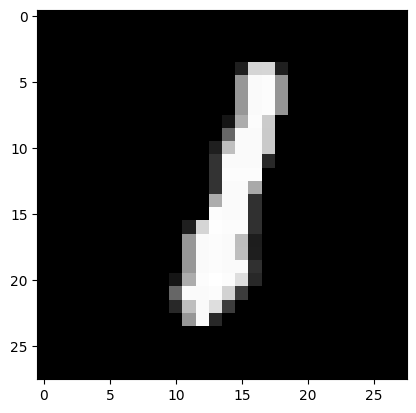

Prediction:  [9]
Label:  9


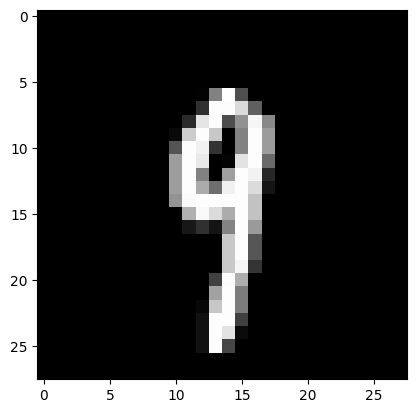

Prediction:  [1]
Label:  1


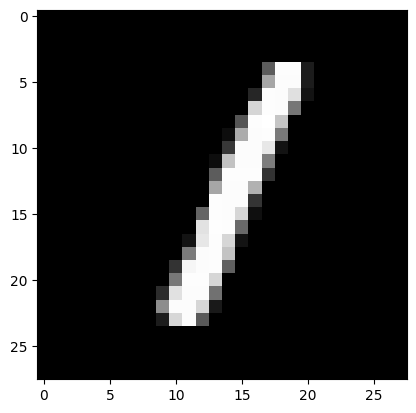

In [35]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

Prediction:  [4]
Label:  4


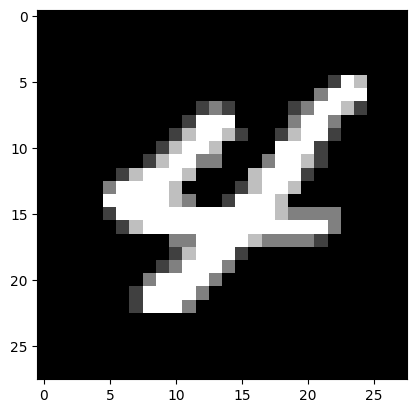

In [36]:
test_prediction(10, W1, b1, W2, b2)

Prediction:  [7]
Label:  7


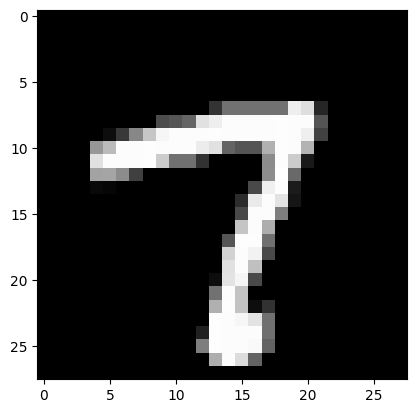

In [37]:
test_prediction(21, W1, b1, W2, b2)